In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
profit = pd.read_csv("50_Startups.csv")
profit.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
profit.tail(10)

,RDSpend,Administration,MarketingSpend,State,Profit
40,28754.33,118546.05,172795.67,California,78239.91
41,27892.92,84710.77,164470.71,Florida,77798.83
42,23640.93,96189.63,148001.11,California,71498.49
43,15505.73,127382.30,35534.17,New York,69758.98
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
profit.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
profit.isna().sum()

RDSpend           0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

In [7]:
profit.corr()

,RDSpend,Administration,MarketingSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RDSpend         50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


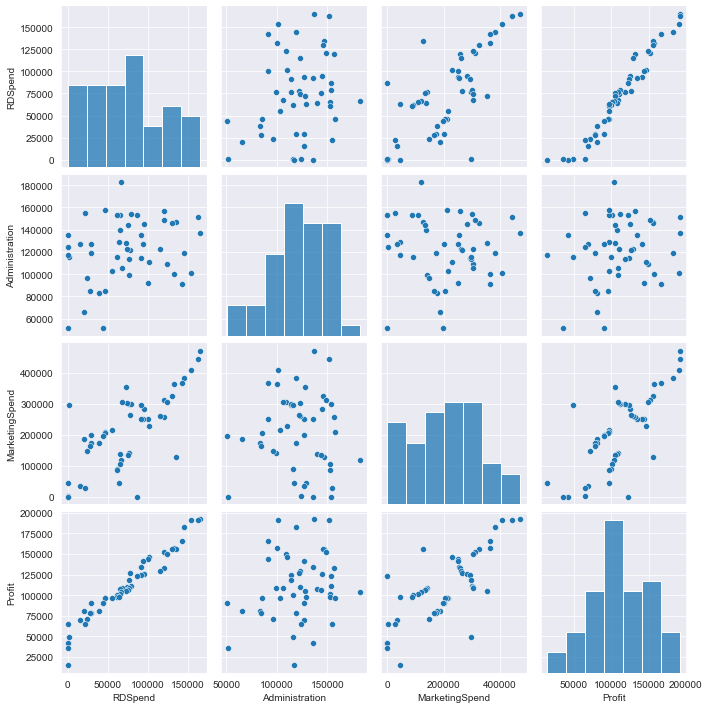

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(profit)

In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Administration+MarketingSpend+State+RDSpend',data=profit).fit()

In [11]:
model.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
Administration          -0.027004
MarketingSpend           0.026980
RDSpend                  0.806023
dtype: float64

In [12]:
print(model.tvalues, '\n', model.pvalues)

Intercept             7.280560
State[T.Florida]      0.058970
State[T.New York]    -0.012864
Administration       -0.517012
MarketingSpend        1.573889
RDSpend              17.368580
dtype: float64 
 Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
Administration       6.077373e-01
MarketingSpend       1.226769e-01
RDSpend              2.578772e-21
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [14]:
ml_A=smf.ols('Profit~Administration',data = profit).fit()  
print(ml_A.tvalues, '\n', ml_A.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [15]:
ml_M=smf.ols('Profit~MarketingSpend',data = profit).fit()  
print(ml_M.tvalues, '\n', ml_M.pvalues) 

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [16]:
ml_AM=smf.ols('Profit~Administration+MarketingSpend',data = profit).fit()  
print(ml_AM.tvalues, '\n', ml_AM.pvalues) 

Intercept         1.142741
Administration    2.467779
MarketingSpend    8.281039
dtype: float64 
 Intercept         2.589341e-01
Administration    1.729198e-02
MarketingSpend    9.727245e-11
dtype: float64


In [17]:
rsq_RDSpend = smf.ols('RDSpend~Administration+MarketingSpend',data=profit).fit().rsquared  
vif_RDSpend = 1/(1-rsq_RDSpend)

rsq_MarketingSpend = smf.ols('MarketingSpend~RDSpend+Administration',data=profit).fit().rsquared  
vif_MarketingSpend = 1/(1-rsq_MarketingSpend)

rsq_Administration = smf.ols('Administration~MarketingSpend+RDSpend',data=profit).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration)

d1 = {'Variables':['Administration','MarketingSpend','RDSpend',],'VIF':[vif_Administration,vif_MarketingSpend,vif_RDSpend,]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Administration,1.175091
1,MarketingSpend,2.326773
2,RDSpend,2.468903


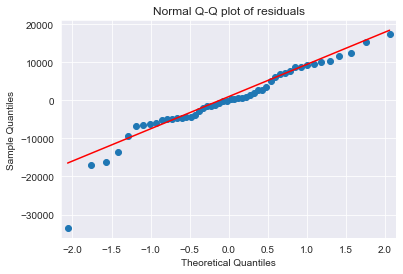

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid>-10000))

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int64)]

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

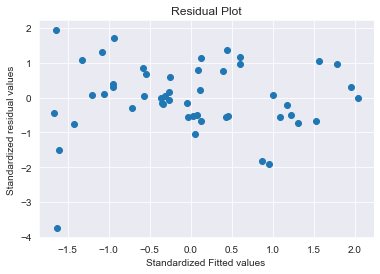

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


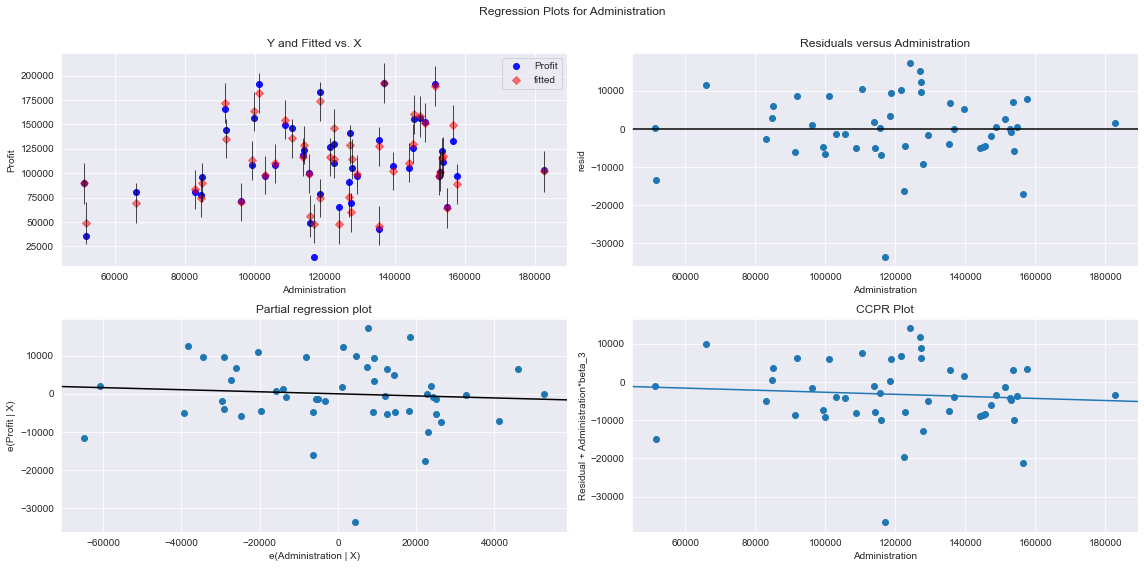

In [22]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

eval_env: 1


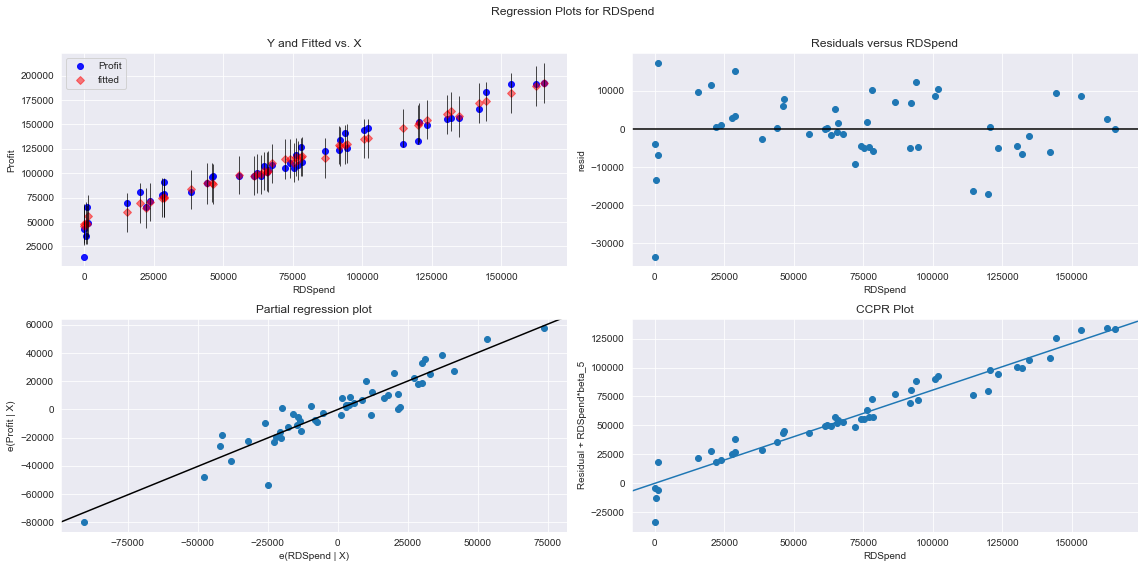

In [23]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

eval_env: 1


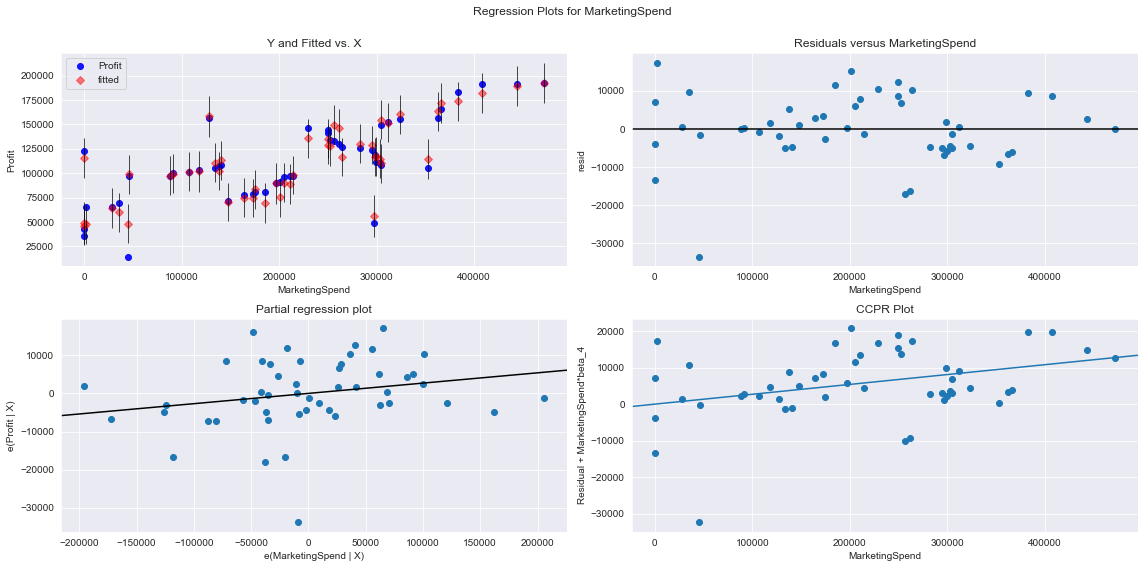

In [24]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

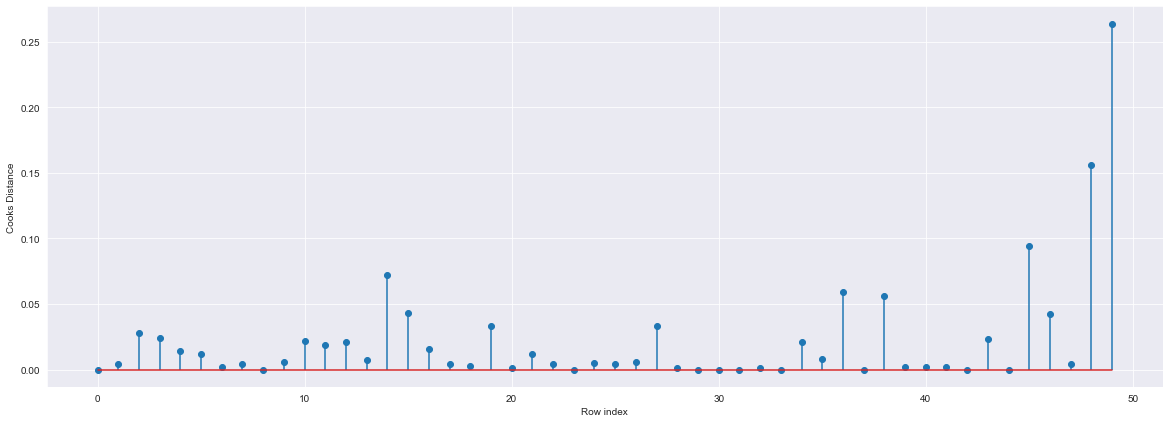

In [26]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(profit)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
(np.argmax(c),np.max(c))

(49, 0.2639594358711302)

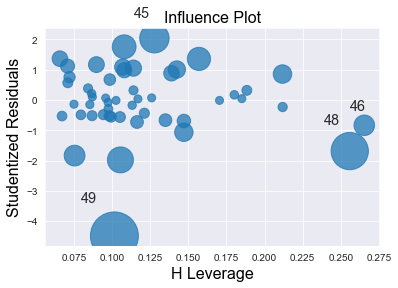

In [28]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [29]:
k = 4 
n = profit.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.30000000000000004

In [61]:
profit[profit.index.isin([ 45])]

,RDSpend,Administration,MarketingSpend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08


In [31]:
profit.head()

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [32]:
profit.tail()

,RDSpend,Administration,MarketingSpend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [33]:
profit_new = pd.read_csv("50_Startups.csv")

In [35]:
profit1=profit_new.drop(profit_new.index[[ 45]],axis=0).reset_index()

In [36]:
profit1=profit1.drop(['index'],axis=1)

In [37]:
profit1

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [46]:
final_ml_profit= smf.ols('Profit~RDSpend+Administration+MarketingSpend',data = profit).fit()

In [48]:
model_influence_profit = final_ml_profit.get_influence()
(c_V, _) = model_influence_profit.cooks_distance

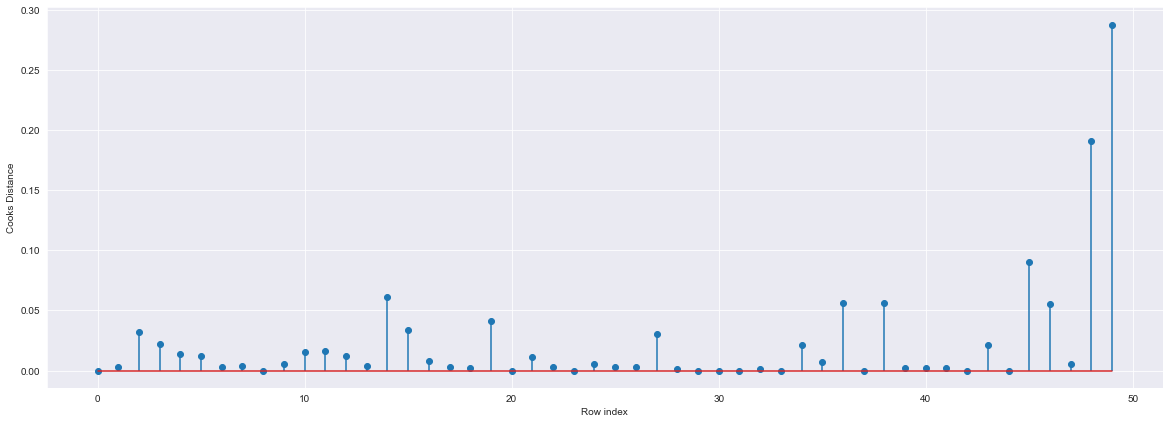

In [49]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [50]:
(np.argmax(c_V),np.max(c_V))

(49, 0.28808229275432634)

In [71]:
profit2=profit1.drop(profit1.index[[44]],axis=0)

#### profit2

In [72]:
profit3=profit2.reset_index()

In [73]:
profit4=profit3.drop(['index'],axis=1)

In [74]:
profit4

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
final_ml_V= smf.ols('Profit~RDSpend+Administration+MarketingSpend',data = profit4).fit()

In [76]:
model_influence_profit= final_ml_profit.get_influence()
(c_V, _) = model_influence_profit.cooks_distance

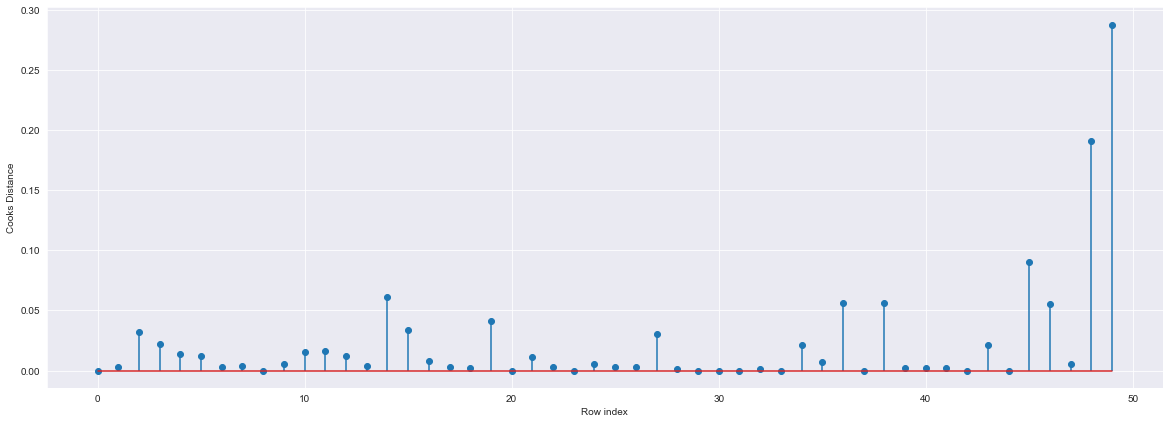

In [77]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(profit)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [78]:
(np.argmax(c_V),np.max(c_V))

(49, 0.28808229275432634)

In [80]:
profit5=profit4.drop(profit1.index[[41]],axis=0)
profit5 

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [81]:
profit5

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [82]:
profit6=profit5.reset_index()
profit6 

,index,RDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [83]:
profit7=profit6.drop(['index'],axis=1)
profit7 

,RDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [84]:
final_ml_profit= smf.ols('Profit~RDSpend+Administration+MarketingSpend',data = profit7).fit()

In [85]:
(final_ml_profit.rsquared,final_ml_profit.aic)

(0.950351619605187, 973.8742181578588)

In [86]:
model_influence_profit = final_ml_profit.get_influence()
(c_V, _) = model_influence_profit.cooks_distance

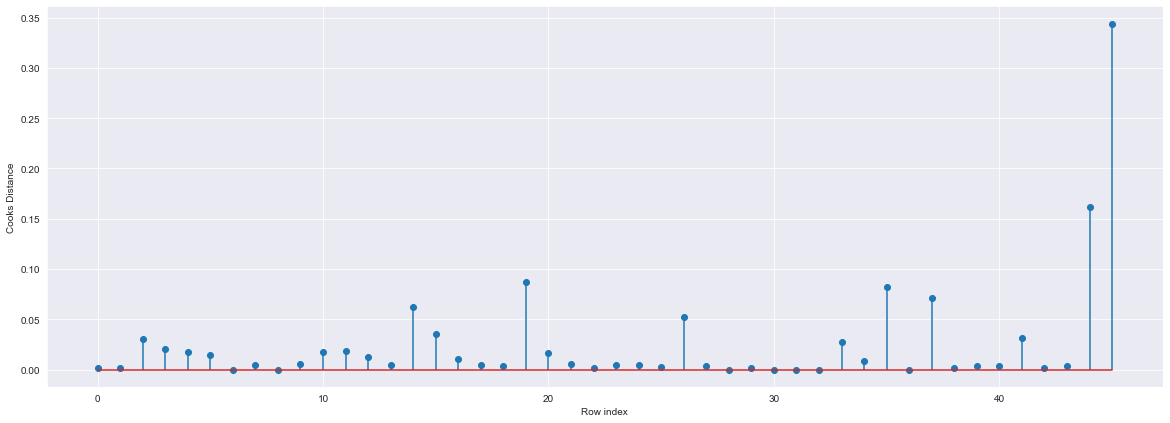

In [87]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [88]:
(np.argmax(c_V),np.max(c_V))

(45, 0.34374758867828065)

In [89]:
new_data=pd.DataFrame({'RDSpend':100000,"Administration":120000,"MarketingSpend":350000,},index=[1])

In [91]:
final_ml_profit.predict(new_data)

1    137691.917438
dtype: float64

In [92]:
final_ml_profit.predict(profit_new.iloc[0:5,])

0    193740.474597
1    190208.655807
2    182802.905753
3    174277.216532
4    172502.717400
dtype: float64

In [93]:
pred_y = final_ml_profit.predict(profit_new)

In [94]:
pred_y

0     193740.474597
1     190208.655807
2     182802.905753
3     174277.216532
4     172502.717400
5     164032.721160
6     156680.418112
7     160304.374223
8     152014.977738
9     154943.449781
10    135109.590675
11    135299.300867
12    129041.987848
13    127459.693187
14    149379.987714
15    146046.002207
16    117062.944032
17    130429.688846
18    129279.991187
19    113545.510243
20    117071.537682
21    117874.723633
22    115228.172251
23    110529.865428
24    112381.728333
25    101475.890090
26    109727.500599
27    115390.849248
28    100859.338127
29    100805.085360
30     98232.035317
31     96573.299063
32     97426.996221
33     97770.077143
34     89122.182150
35     90311.012765
36     75338.794123
37     89250.632502
38     69483.948386
39     83324.398314
40     74596.155843
41     74406.175264
42     70157.821872
43     58913.231568
44     63328.857432
45     46223.623832
46     57243.986643
47     45093.439388
48     47491.050411
49     47144.563131
